#### Fardin Rastakhiz @2023

In [1]:
# !git clone https://github.com/raziehAskarizade/Beyond-Words.git

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/Beyond-Words

In [4]:
# !pip install torch_geometric
# !pip install py-flags
# !pip install spacy
# !pip install torchmetrics
# !pip install lightning
# !pip install spacy
# !pip install tqdm
# !python -m spacy download en_core_web_lg
# !pip install spacytextblob

In [5]:
# !pip install stanza

In [6]:
# !git clone https://github.com/facebookresearch/fastText.git
# !cd fastText && pip install .

In [7]:
from Scripts.Configs.ConfigClass import Config
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
import os
from Scripts.DataManager.GraphLoader.DigiKalaGraphDataModule import DigiKalaGraphDataModule
import torch
from torch.utils.flop_counter import FlopCounterMode
root_path = %pwd
config = Config(root_path)
# config = Config(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence2\ColorIntelligence')
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 2

c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [11]:
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding4 import HeteroDeepGraphEmbedding4
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding5 import HeteroDeepGraphEmbedding5
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding6 import HeteroDeepGraphEmbedding6
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding8 import HeteroDeepGraphEmbedding8

In [12]:
from Scripts.Models.LightningModels.LightningModels import HeteroMultiClassLightningModel
from Scripts.Models.LossFunctions.HeteroLossFunctions import MulticlassHeteroLoss1, MulticlassHeteroLoss2, MulticlassHeteroLoss3
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
import lightning as L
from lightning.pytorch.tuner import Tuner
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [10]:
import stanza

In [11]:
print(stanza.__version__)

1.8.2


In [12]:

graph_type = TextGraphType.SEQUENTIAL
data_manager = DigiKalaGraphDataModule(config, test_size=0.2, val_size=0.2, has_val=True , has_test=True, shuffle=False, drop_last=False, start_data_load=0 , end_data_load = 100 , device='cpu', batch_size=batch_size, graph_type=graph_type, load_preprocessed_data = False)
data_manager.load_labels()
data_manager.load_graphs()

AAAA
BBBB


2024-05-27 21:24:05 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 21:24:11 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 21:24:12 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 21:24:12 INFO: Using device: cpu
2024-05-27 21:24:12 INFO: Loading: tokenize
2024-05-27 21:24:13 INFO: Loading: mwt
2024-05-27 21:24:13 INFO: Loading: pos
2024-05-27 21:24:13 INFO: Loading: lemma
2024-05-27 21:24:13 INFO: Loading: depparse
2024-05-27 21:24:13 INFO: Loading: ner
2024-05-27 21:24:14 INFO: Done loading processors!
 Creating Graphs : 100%|████

filename: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/SnapFood\seq_gen\graph_var.txt
self.start_data_load: 0
self.end_data_load: 100
self.saving_batch_size: 1000


 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/SnapFood\seq_gen\0_100_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 100/100 [04:09<00:00,  2.50s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [04:39<00:00, 279.58s/it]

after loading data and pass


In [13]:
X, y = next(iter(data_manager.test_dataloader()))

In [14]:
X

HeteroDataBatch(
  general={
    x=[2, 300],
    batch=[2],
    ptr=[3],
  },
  word={
    x=[75, 300],
    batch=[75],
    ptr=[3],
  },
  (general, general_word, word)={
    edge_index=[2, 75],
    edge_attr=[75],
  },
  (word, word_general, general)={
    edge_index=[2, 75],
    edge_attr=[75],
  },
  (word, seq, word)={
    edge_index=[2, 146],
    edge_attr=[146],
  }
)

In [46]:
from Scripts.DataManager.GraphConstructor.SequentialGraphConstructor import SequentialGraphConstructor

texts = ['این کتاب زبانزد است.' , 'اما گران است.']
graph_const = SequentialGraphConstructor(texts, r'graphs/sequence',config=config, naming_prepend='graph', start_data_load=0, end_data_load=2, load_preprocessed_data=False , use_compression=True , use_general_node=True)
# graph_const.setup(load_preprocessed_data=True)

AAAA
BBBB


2024-05-27 21:42:52 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 21:42:57 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 21:42:58 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 21:42:58 INFO: Using device: cpu
2024-05-27 21:42:58 INFO: Loading: tokenize
2024-05-27 21:42:58 INFO: Loading: mwt
2024-05-27 21:42:58 INFO: Loading: pos
2024-05-27 21:42:58 INFO: Loading: lemma
2024-05-27 21:42:58 INFO: Loading: depparse
2024-05-27 21:42:58 INFO: Loading: ner
2024-05-27 21:42:59 INFO: Done loading processors!


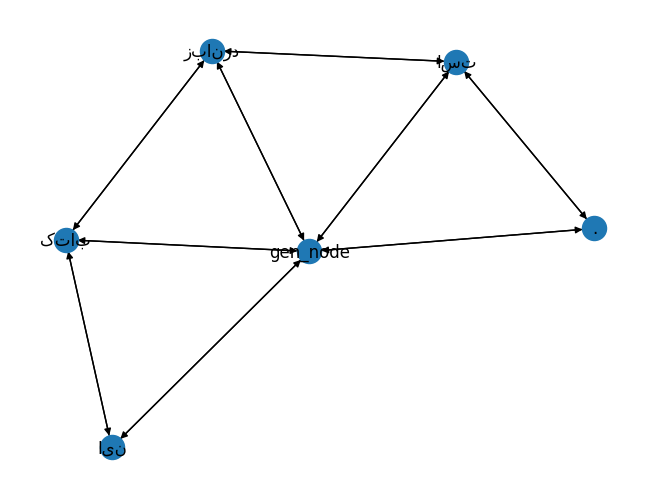

In [48]:
graph_const.draw_graph(0)

In [17]:
# data_manager.update_batch_size(256)

In [18]:
val_dataloader = data_manager.val_dataloader()
X3, Y3 = next(iter(val_dataloader))

In [19]:
len(val_dataloader)

10

In [20]:
from copy import copy
metadata = copy(X3.metadata())

In [21]:

edge_type_weights = {
    # 'full': [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
    # 'full-non-sentiment': [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
    'seq': [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    # 'dep': [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    # 'tag': [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    # 'general_sentence': [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
    # 'sentence': [0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
    # 'sentiment': [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
}
# type_checkpoint = {
#     #  'dep': r'logs\hetero_model_14_AG\version_0\checkpoints\epoch=38-step=17199.ckpt',
#      'tag': r'logs\hetero_model_15_AG_tag\version_0\checkpoints\epoch=9-step=4410.ckpt',
#      'general_sentence': '',
#      'sentence': '',
# }

In [22]:
# edge_type_weights = {
#     'seq_gen': [1, 1, 1],
#     'seq': [0, 0, 1]
# }
# type_checkpoint = {
#     'seq_gen': r'logs\hetero_model_12_AG\version_1\checkpoints\epoch=24-step=11025.ckpt',
#     'seq': r'logs\hetero_model_12_AG\version_2\checkpoints\epoch=22-step=10143.ckpt'
# }

In [23]:
from os import path
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss
import torchmetrics

def save_evaluation(model_mgr, eval_dataloader, name_prepend: str='',
                 give_confusion_matrix: bool=True,
                 give_report: bool=True,
                 give_f1_score: bool=False,
                 give_accuracy_score: bool=False,
                 give_precision_score: bool=False,
                 give_recall_score: bool=False,
                 give_hinge_loss: bool=False,
                 multi_class: bool=False
                 ):

        test_metrics_path = path.join(model_mgr.log_dir, model_mgr.log_name, f'version_{model_mgr.logger.version}', f'{name_prepend}_test_metrics.txt')

        y_true = []
        y_pred = []
        model_mgr.lightning_model.eval()
        model_mgr.lightning_model.model.eval()
        model_mgr.torch_model.eval()
        for X, y in eval_dataloader:
            model_mgr.trainer.model.eval()
            with torch.no_grad():
                y_p = model_mgr.trainer.model(X.to(model_mgr.device))
            if type(y_p) is tuple:
                y_p = y_p[0]

            if multi_class:
                y_pred.append(y_p.detach().to(y.device))
                y_true.append(y)
            else:
                y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        print(y_true.shape)
        print(y_pred.shape)
        if multi_class:
            y_true_num = torch.argmax(y_true, dim=1)
            y_pred_num = torch.argmax(y_pred, dim=1)
        else:
            y_true_num = y_true
            y_pred_num = y_pred

        print(y_true_num.shape)
        print(y_pred_num.shape)
        with open(test_metrics_path, 'at+') as f:
            if(give_confusion_matrix):
                print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
            if(give_report):
                print(classification_report(y_true_num, y_pred_num), file=f)
            if(give_f1_score):
                if multi_class:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
            if(give_accuracy_score):
                print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
            if(give_precision_score):
                if multi_class:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num)}', file=f)
            if(give_recall_score):
                if multi_class:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num)}', file=f)
            if(give_hinge_loss):
                print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)


In [24]:
(metadata[0].remove(x, inplace=True) for x in ['dep', 'tag', 'sentence', 'sentiment'])

<generator object <genexpr> at 0x0000025E935F4740>

In [25]:
metadata

(['general', 'word'],
 [('general', 'general_word', 'word'),
  ('word', 'word_general', 'general'),
  ('word', 'seq', 'word')])

In [26]:
# metadata = (['word'], [('word', 'seq', 'word')])

In [27]:
[x for x in metadata[0] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

['general', 'word']

In [28]:
[x for x in metadata[1] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

[('general', 'general_word', 'word'),
 ('word', 'word_general', 'general'),
 ('word', 'seq', 'word')]

In [29]:
for k in edge_type_weights:
    graph_embedding = HeteroDeepGraphEmbedding8(300, 2, metadata, 32, dropout=0.2, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys = ['word','general'])
    graph_embedding = graph_embedding.to(device)
    # callbacks = [
    # ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
    # ]


    # loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0002)
    # optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.0012)
    # lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10, 20, 35], gamma=0.6, verbose=True)
    # lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
    #                                     optimizer=optimizer,
    #                                     loss_func=loss_func,
    #                                     learning_rate=0.0045,
    #                                     batch_size=batch_size,
    #                                     user_lr_scheduler=True,
    #                                     lr_scheduler=lr_scheduler,
    #                                     min_lr=0.0005
    #                                     ).to(device)
    # lightning_model.model.to(device)

    # model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_18_AG',device=device, num_train_epoch=70)
    flopt_counter = FlopCounterMode(graph_embedding)
    with flopt_counter:
        graph_embedding(X3.to(device))
    # model_manager.draw_summary(data_manager.val_dataloader())
    # model_manager.fit(datamodule=data_manager, ckpt_path=r'logs\hetero_model_18_AG\version_8\checkpoints\epoch=38-step=18252.ckpt')

    # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{k}')
    # model_manager.torch_model = model_manager.torch_model.to(device)
    # save_evaluation(model_manager, data_manager.val_dataloader(), f'{k}',True, True, True, True, True, True, True, multi_class=True)

Module                                           FLOP    % Total
------------------------------------------  ---------  ---------
HeteroDeepGraphEmbedding8                   3456.680K    100.00%
 - aten.addmm                               3323.136K     96.14%
 - aten.mm                                   115.424K      3.34%
 - aten.convolution                            0.120K      0.00%
 - aten.bmm                                   18.000K      0.52%
 HeteroDeepGraphEmbedding8.hetero_linear1    614.400K     17.77%
  - aten.addmm                               614.400K     17.77%
 HeteroDeepGraphEmbedding8.hetero_gat_1      261.376K      7.56%
  - aten.addmm                               253.952K      7.35%
  - aten.mm                                    7.424K      0.21%
 HeteroDeepGraphEmbedding8.hetero_linear_2    65.536K      1.90%
  - aten.addmm                                65.536K      1.90%
 HeteroDeepGraphEmbedding8.hetero_gat_2     2450.400K     70.89%
  - aten.addmm           

c:\Users\razieh\Downloads\Beyond-Words\Scripts\Models\GraphEmbedding\HeteroDeepGraphEmbedding8.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)


In [30]:
import torch.nn.functional as F
from torch import Tensor
import torch
from torch.nn import Linear
from torch_geometric.nn import BatchNorm, MemPooling, to_hetero, PairNorm
from torch_geometric.data import HeteroData
from Scripts.Models.BaseModels.HeteroGat import HeteroGat
from Scripts.Models.BaseModels.HeteroLinear import HeteroLinear

class HeteroDeepGraphEmbedding6(torch.nn.Module):

    def __init__(self,
                 input_feature: int, out_features: int,
                 metadata,
                 hidden_feature: int=256,
                 device = 'cpu',
                 dropout=0.1,
                 edge_type_count=9,
                 edge_type_weights=-1,
                 active_keys = ['dep', 'tag', 'word', 'sentence', 'general'],
                 num_pooling_classes=1
                 ):

        super(HeteroDeepGraphEmbedding6, self).__init__()
        self.input_features = input_feature
        self.num_out_features = out_features
        self.hidden_feature: int = hidden_feature
        self.edge_type_count = edge_type_count
        self.edge_type_weights = torch.nn.Parameter(torch.tensor([1]* self.edge_type_count if edge_type_weights==-1 else  edge_type_weights).to(torch.float32), requires_grad=False)

        self.part_weight_norm = torch.nn.LayerNorm((self.edge_type_count,))
        self.norm = PairNorm()
        self.drop = torch.nn.Dropout(0.2)
        self.active_keys = active_keys

        self.hetero_linear1 = to_hetero(HeteroLinear(self.input_features,self.hidden_feature, use_dropout=False, use_batch_norm=True), metadata)

        self.hetero_gat_1 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)
        self.hetero_gat_2 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)

        self.hetero_linear_2 = to_hetero(HeteroLinear(self.hidden_feature, self.input_features, dropout, use_batch_norm=True), metadata)

        self.num_pooling_classes = torch.nn.Parameter(torch.tensor(num_pooling_classes).to(torch.int32), requires_grad=False)
        self.mem_pool = MemPooling(self.hidden_feature, self.hidden_feature, 2, self.num_pooling_classes)

        self.linear_1 = Linear(self.hidden_feature* self.num_pooling_classes, self.hidden_feature)
        self.linear_2 = Linear(self.hidden_feature, self.hidden_feature)
        self.batch_norm_1 = BatchNorm(self.hidden_feature)

        self.output_layer = Linear(self.hidden_feature, self.num_out_features)

        self.dep_embedding = torch.nn.Embedding(45, self.input_features)
        self.tag_embedding = torch.nn.Embedding(50, self.input_features)
        self.dep_unembedding = torch.nn.Linear(self.hidden_feature, 45)
        self.tag_unembedding = torch.nn.Linear(self.hidden_feature, 50)

        self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)

        self.x_batches = None
        self.x_batches_cpu = None
        self.x_dict_cpu_1 = None
        self.x_dict_cpu_2 = None


    def forward(self, x: HeteroData) -> Tensor:
        self.x_batches = {k:x[k].batch for k in self.active_keys}
        # self.x_batches_cpu = {k:self.x_batches[k].to('cpu') for k in self.active_keys}
        x_dict, edge_attr_dict, edge_index_dict = self.preprocess_data(x)
        edge_attr_dict = self.update_weights(edge_attr_dict, self.pw1)
        x_dict = self.hetero_linear1(x_dict)
        x_dict = self.hetero_gat_1(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_1 = {k: x_dict[k].to('cpu') for k in x_dict}
        self.normalize(x_dict, self.x_batches)
        x_dict = self.hetero_gat_2(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_2 = {k: x_dict[k].to('cpu') for k in x_dict}
        x_pooled, S = self.mem_pool(x_dict['word'], self.x_batches['word'])

        x_pooled = x_pooled.view(x_pooled.shape[0], -1)
        x_pooled = F.relu(self.linear_1(x_pooled))
        x_pooled = F.relu(self.batch_norm_1(self.linear_2(x_pooled)))
        out = self.output_layer(x_pooled)

        x_dict_out = self.hetero_linear_2(x_dict)
        if 'dep' in x_dict_out:
            x_dict_out['dep'] = self.dep_unembedding(x_dict['dep'])
        if 'tag' in x_dict_out:
            x_dict_out['tag'] = self.tag_unembedding(x_dict['tag'])

        return out, x_dict_out

    def preprocess_data(self, x):
        x_dict = {key: x.x_dict[key] for key in x.x_dict}
        if 'dep' in x_dict:
            x_dict['dep'] = self.dep_embedding(x_dict['dep'])
        if 'tag' in x_dict:
            x_dict['tag'] = self.tag_embedding(x_dict['tag'])

        edge_attr_dict = x.edge_attr_dict
        edge_index_dict = x.edge_index_dict

        return x_dict, edge_attr_dict, edge_index_dict

    def normalize(self, x_dict, x_batches):
        for k in self.active_keys:
            vecs = x_dict[k]
            if k not in x_batches:
                print('k is not in x_batches')
                continue
            batches = x_batches[k]
            if batches is None:
                print('batches is none')
                continue
            if len(batches) == 0:
                print('batches is empty')
                continue

            x_dict[k] = self.norm(vecs, batches)
        return x_dict

    def update_weights(self, edge_attr_dict, part_weights):
        for i, key in enumerate(edge_attr_dict):
            edge_attr = edge_attr_dict[key]
            if edge_attr is None or edge_attr == ('word', 'seq', 'word'):
                continue
            edge_attr_dict[key]= edge_attr * part_weights[i]
        return edge_attr_dict

    def get_scale_same(self, scale:float, attributes: Tensor):
        if attributes is None or len(attributes) == 0:
            return
        attributes = scale * torch.ones_like(attributes)
        return attributes

In [31]:
from typing import List
import torch
from torch import nn

from Scripts.Models.LossFunctions.HeteroLossArgs import HeteroLossArgs


class MulticlassHeteroLoss2(torch.nn.Module):
    def __init__(self, exception_keys: List[str], enc_factor=0.0, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.cel_loss=  torch.nn.CrossEntropyLoss()
        self.mse_loss = torch.nn.MSELoss()
        self.exception_keys = exception_keys
        self.enc_factor = enc_factor

    def forward(self, out_pred: HeteroLossArgs, out_main: HeteroLossArgs):
        loss = self.cel_loss(out_pred.y, out_main.y)
        x_dict_keys = [k for k in out_pred.x_dict.keys() if k not in self.exception_keys]

        for key in x_dict_keys:
            tensor1 = out_pred.x_dict[key]
            tensor2 = out_main.x_dict[key]
            if tensor2.ndim == 1 and tensor2.dtype is torch.long:
                tensor2 = torch.nn.functional.one_hot(input=tensor2.to(torch.long), num_classes=tensor1.shape[1]).to(torch.float32)
            loss += self.enc_factor * (self.mse_loss(tensor1, tensor2))
        return loss

In [32]:
metadata

(['general', 'word'],
 [('general', 'general_word', 'word'),
  ('word', 'word_general', 'general'),
  ('word', 'seq', 'word')])

In [33]:
# Fardin Rastakhiz @ 2023


from torch import nn, Tensor
import torch.nn.functional as F
from torch_geometric.nn import BatchNorm


class HeteroLinear(nn.Module):

    def __init__(self, in_feature, out_feature, dropout = 0.2, use_dropout=True, use_batch_norm=False, use_activation=True) -> None:
        super().__init__()
        self.linear = nn.Linear(in_feature, out_feature)
        self.batch_norm = BatchNorm(out_feature)
        self.dropout= nn.Dropout(dropout)
        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout
        self.use_activation=use_activation

    def forward(self, x: Tensor) -> Tensor:

        x = self.linear(x)
        if self.use_batch_norm:
            x = self.batch_norm(x)
        if self.use_activation:
            x = F.leaky_relu(x)
        if self.use_dropout:
            x = self.dropout(x)
        return x

In [34]:
import torch
print(torch.cuda.device_count())

0


In [35]:
device

device(type='cpu')

In [36]:
X.metadata

<bound method HeteroData.metadata of HeteroDataBatch(
  general={
    x=[2, 300],
    batch=[2],
    ptr=[3],
  },
  word={
    x=[75, 300],
    batch=[75],
    ptr=[3],
  },
  (general, general_word, word)={
    edge_index=[2, 75],
    edge_attr=[75],
  },
  (word, word_general, general)={
    edge_index=[2, 75],
    edge_attr=[75],
  },
  (word, seq, word)={
    edge_index=[2, 146],
    edge_attr=[146],
  }
)>

In [37]:
y.shape

torch.Size([2, 2])

In [38]:
for i in range(1):
    for k in edge_type_weights:
        graph_embedding = HeteroDeepGraphEmbedding6(300, 2, metadata, 32, dropout=0.1, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys=['word', 'general'])
        graph_embedding = graph_embedding.to(device)
        callbacks = [
        ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
        ]
        loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0003)
        optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.00125)
        lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
        lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
                                            optimizer=optimizer,
                                            loss_func=loss_func,
                                            learning_rate=0.045,
                                            batch_size=batch_size,
                                            user_lr_scheduler=True,
                                            lr_scheduler=lr_scheduler,
                                            min_lr=0.0005
                                            ).to(device)
        lightning_model.model.to(device)

        model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=70)
        model_manager.fit(datamodule=data_manager)
        # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
        model_manager.torch_model = model_manager.torch_model.to(device)
        # save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

C:\Users\razieh\AppData\Local\Temp\ipykernel_23232\2718485509.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
GPU available: False, used: False
TPU

Epoch 0:   0%|          | 0/30 [00:00<?, ?it/s] 

Epoch 69: 100%|██████████| 30/30 [00:00<00:00, 31.73it/s, v_num=9, train_loss_step=0.0671, train_acc_step=1.000, val_acc=1.000, train_loss_epoch=0.303, train_acc_epoch=0.867]

`Trainer.fit` stopped: `max_epochs=70` reached.


Epoch 69: 100%|██████████| 30/30 [00:00<00:00, 31.43it/s, v_num=9, train_loss_step=0.0671, train_acc_step=1.000, val_acc=1.000, train_loss_epoch=0.303, train_acc_epoch=0.867]


# Text to Graph Tasks

# Test \Practices\Tasks\TextToGraph\TextToTagsGraph.ipynb

In [52]:
import pandas as pd
train_df = pd.read_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\train_sm.csv")
test_df = pd.read_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\test_sm.csv")

In [53]:
train_df.columns = ['comment', 'label', 'label_id']
test_df.columns = ['comment', 'label', 'label_id']

In [54]:
train_df = train_df[['label', 'comment']]
test_df = test_df[['label', 'comment']]

In [55]:
from Scripts.DataManager.GraphConstructor.TagsGraphConstructor import TagsGraphConstructor

In [1]:
text = ['.این کتاب زبانزد است. اما گران است', 'من کتاب های طنز را دوست دارم.', 'پزشک های مهربان در حال انقراض هستند.', 'مطالب این کتاب جالب هستند.', 'کتاب های بسیار خوبی خوانده ام.']

In [96]:
# graph_const = TagsGraphConstructor(train_df['comment'][:10], r'data\GraphData\Tag', config, naming_prepend='graph', load_preprocessed_data=False, use_compression=True)
graph_const = TagsGraphConstructor(text, r'data\GraphData\Tag', config, naming_prepend='graph', load_preprocessed_data=False, use_compression=True)
graph_const.setup(load_preprocessed_data=False)

graph_const.save_all_data_compressed()

graph_const.load_all_data_comppressed()
print(graph_const.get_first())
print(graph_const.get_first()["word"].x)
print(graph_const.get_first()["tag"].x)

2024-05-27 22:18:33 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 22:18:37 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 22:18:38 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 22:18:38 INFO: Using device: cpu
2024-05-27 22:18:38 INFO: Loading: tokenize
2024-05-27 22:18:38 INFO: Loading: mwt
2024-05-27 22:18:38 INFO: Loading: pos
2024-05-27 22:18:38 INFO: Loading: lemma
2024-05-27 22:18:38 INFO: Loading: depparse
2024-05-27 22:18:38 INFO: Loading: ner
2024-05-27 22:18:39 INFO: Done loading processors!
 Creating Graphs : 100%|████

.
این
کتاب
زبانزد
است
.
اما
گران
است
من
کتاب
های
طنز
را
دوست
داشت
.
پزشک
های
مهربان
در
حال
انقراض
هست
.
مطلب
این
کتاب
جالب
هست
.
کتاب
های
بسیار
خوب
خواند
هست
.
filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Tag\graph_var.txt
self.start_data_load: 0
self.end_data_load: 5
self.saving_batch_size: 1000


data path: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Tag\0_5_compressed.pt
first step after loading data








Prepare loaded data: 100%|██████████| 5/5 [00:13<00:00,  2.64s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [00:43<00:00, 43.22s/it]

after loading data and pass
.
این
کتاب
زبانزد
است
.
اما
گران
است


من
کتاب
های
طنز
را
دوست
داشت
.
پزشک
های
مهربان
در
حال
انقراض
هست
.
مطلب
این
کتاب
جالب
هست
.
کتاب
های
بسیار
خوب
خواند
هست
.
filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Tag\graph_var.txt
data loading 0
HeteroData(
  tag={
    length=17,
    x=[17],
  },
  word={ x=[9, 300] },
  (tag, tag_word, word)={
    edge_index=[2, 9],
    edge_attr=[9],
  },
  (word, word_tag, tag)={
    edge_index=[2, 9],
    edge_attr=[9],
  },
  (word, seq, word)={
    edge_index=[2, 16],
    edge_attr=[16],
  }
)
tensor([[-0.1866, -0.1177,  0.0247,  ...,  0.0302,  0.0012, -0.0026],
        [ 0.0954,  0.1990, -0.0511,  ..., -0.0092, -0.0296,  0.0649],
        [ 0.1326,  0.0736, -0.1074,  ..., -0.0593,  0.0323, -0.0655],
        ...,
        [-0.0672,  0.0895, -0.0362,  ...,  0.0128,  0.0167,  0.0283],
        [-0.0758,  0.0218, -0.0070,  ...,  0.0784,  0.0457,  0.0124],
        [ 0.0756,  0.0718, -0.0699,  ...,  0.0005, -0.0156,  0.0105]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 1

In [97]:
# graph_const.save_all_data_compressed()

In [98]:
graph_const.load_all_data_comppressed()
print(graph_const.get_first())
print(graph_const.get_first()["word"].x)
print(graph_const.get_first()["tag"].x)

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Tag\graph_var.txt
data loading 0
HeteroData(
  tag={
    length=17,
    x=[17],
  },
  word={ x=[9, 300] },
  (tag, tag_word, word)={
    edge_index=[2, 9],
    edge_attr=[9],
  },
  (word, word_tag, tag)={
    edge_index=[2, 9],
    edge_attr=[9],
  },
  (word, seq, word)={
    edge_index=[2, 16],
    edge_attr=[16],
  }
)
tensor([[-0.1866, -0.1177,  0.0247,  ...,  0.0302,  0.0012, -0.0026],
        [ 0.0954,  0.1990, -0.0511,  ..., -0.0092, -0.0296,  0.0649],
        [ 0.1326,  0.0736, -0.1074,  ..., -0.0593,  0.0323, -0.0655],
        ...,
        [-0.0672,  0.0895, -0.0362,  ...,  0.0128,  0.0167,  0.0283],
        [-0.0758,  0.0218, -0.0070,  ...,  0.0784,  0.0457,  0.0124],
        [ 0.0756,  0.0718, -0.0699,  ...,  0.0005, -0.0156,  0.0105]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])


In [99]:
graph_const = TagsGraphConstructor(text, r'data\GraphData\Tag', config, naming_prepend='graph', load_preprocessed_data=False, use_compression=True)

2024-05-27 22:20:18 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 22:20:20 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 22:20:21 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 22:20:21 INFO: Using device: cpu
2024-05-27 22:20:21 INFO: Loading: tokenize
2024-05-27 22:20:21 INFO: Loading: mwt
2024-05-27 22:20:21 INFO: Loading: pos
2024-05-27 22:20:21 INFO: Loading: lemma
2024-05-27 22:20:21 INFO: Loading: depparse
2024-05-27 22:20:22 INFO: Loading: ner
2024-05-27 22:20:22 INFO: Done loading processors!


In [100]:
# print(graph_const.get_first())
# print(graph_const.get_first()["word"].x)
# print(graph_const.get_first()["tag"].x)

# Test \Practices\Tasks\TextToGraph\TextToSequentialGraph.ipynb

In [101]:
from Scripts.DataManager.GraphConstructor.SequentialGraphConstructor import SequentialGraphConstructor

In [102]:
graph_const = SequentialGraphConstructor(text, r'data\GraphData\Sequential', config, naming_prepend='graph', load_preprocessed_data=False , use_general_node=True,use_compression=True , num_general_nodes=8)
# graph = graph_const.to_graph(train_df['Review'][0])
graph_const.setup(load_preprocessed_data=False)

AAAA
BBBB


2024-05-27 22:20:58 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 22:21:01 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 22:21:02 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 22:21:02 INFO: Using device: cpu
2024-05-27 22:21:02 INFO: Loading: tokenize
2024-05-27 22:21:02 INFO: Loading: mwt
2024-05-27 22:21:02 INFO: Loading: pos
2024-05-27 22:21:02 INFO: Loading: lemma
2024-05-27 22:21:02 INFO: Loading: depparse
2024-05-27 22:21:02 INFO: Loading: ner
2024-05-27 22:21:03 INFO: Done loading processors!
 Creating Graphs : 100%|████

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\graph_var.txt
self.start_data_load: 0
self.end_data_load: 5
self.saving_batch_size: 1000


data path: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\0_5_compressed.pt
first step after loading data



c:\Users\razieh\Downloads\Beyond-Words\Scripts\DataManager\GraphConstructor\SequentialGraphConstructor.py:224: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  general_word_edge_index = torch.transpose(torch.tensor(
c:\Users\razieh\Downloads\Beyond-Words\Scripts\DataManager\GraphConstructor\SequentialGraphConstructor.py:226: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  word_general_edge_index = torch.transpose(torch.tensor(





Prepare loaded data: 100%|██████████| 5/5 [00:13<00:00,  2.67s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [00:43<00:00, 43.38s/it]

after loading data and pass


In [103]:
graph_const.save_all_data_compressed()
graph_const.load_all_data_comppressed()

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\graph_var.txt
data loading 0


In [104]:
print(graph_const.get_first()["word", "word_general", "general"].edge_attr)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [105]:
print(graph_const.get_first()["word", "word_general", "generasl"])

{}


In [113]:
print(graph_const.get_first()['general', 'general_sentence', 'sentence'])

{}


In [116]:
print(graph_const.get_first()['word', 'seq', 'word'].edge_attr)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [117]:
print(graph_const.get_first()['word', 'word_general', 'general'].edge_attr)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


# Test \Practices\Tasks\TextToGraph\TagDepTokenGraphConstructionTest.ipynb

In [118]:
from Scripts.DataManager.GraphConstructor.TagDepTokenGraphConstructor import TagDepTokenGraphConstructor

In [119]:
graph_const = TagDepTokenGraphConstructor(text, r'data\GraphData\Full-WSentence-WGeneral', config, naming_prepend='graph', load_preprocessed_data=True, use_sentence_nodes=True, use_general_node=True , use_compression=True)
graph_const.setup(load_preprocessed_data=False)

2024-05-27 22:26:26 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 22:26:31 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 22:26:32 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 22:26:32 INFO: Using device: cpu
2024-05-27 22:26:32 INFO: Loading: tokenize
2024-05-27 22:26:32 INFO: Loading: mwt
2024-05-27 22:26:32 INFO: Loading: pos
2024-05-27 22:26:32 INFO: Loading: lemma
2024-05-27 22:26:32 INFO: Loading: depparse
2024-05-27 22:26:33 INFO: Loading: ner
2024-05-27 22:26:33 INFO: Done loading processors!
 Creating Graphs : 100%|████

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Full-WSentence-WGeneral\graph_var.txt
self.start_data_load: 0
self.end_data_load: 5
self.saving_batch_size: 1000


data path: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Full-WSentence-WGeneral\0_5_compressed.pt
first step after loading data








Prepare loaded data: 100%|██████████| 5/5 [00:13<00:00,  2.64s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [00:43<00:00, 43.21s/it]

after loading data and pass


In [120]:
print(graph_const.get_graph(0).edge_attr_dict[('sentence' , 'sentence_word' , 'word')])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [121]:
graph_const.draw_graph(0)

# Test \Practices\Tasks\TextToGraph\SentenceGraphConstructorTest.ipynb

In [2]:
from Scripts.DataManager.GraphConstructor.SentenceGraphConstructor import SentenceGraphConstructor

c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [14]:
graph_const = SentenceGraphConstructor(text, r'data\GraphData\Sequential', config, naming_prepend='graph', load_preprocessed_data=False , use_general_node=True,use_compression=True , num_general_nodes=8)
# graph = graph_const.to_graph(train_df['Review'][0])
graph_const.setup(load_preprocessed_data=False)

AAAA
BBBB


2024-05-27 23:26:41 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 23:26:45 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 23:26:47 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 23:26:47 INFO: Using device: cpu
2024-05-27 23:26:47 INFO: Loading: tokenize
2024-05-27 23:26:48 INFO: Loading: mwt
2024-05-27 23:26:48 INFO: Loading: pos
2024-05-27 23:26:49 INFO: Loading: lemma
2024-05-27 23:26:49 INFO: Loading: depparse
2024-05-27 23:26:49 INFO: Loading: ner
2024-05-27 23:26:50 INFO: Done loading processors!
2024-05-27 23:27:10 INFO: Ch

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\graph_var.txt
self.start_data_load: 0
self.end_data_load: 5
self.saving_batch_size: 1000


 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\0_5_compressed.pt
first step after loading data


c:\Users\razieh\Downloads\Beyond-Words\Scripts\DataManager\GraphConstructor\SequentialGraphConstructor.py:253: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  general_sentence_edge_index = torch.transpose(torch.tensor(
c:\Users\razieh\Downloads\Beyond-Words\Scripts\DataManager\GraphConstructor\SequentialGraphConstructor.py:255: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sentence_general_edge_index = torch.transpose(torch.tensor(
Prepare loaded data: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [00:46<00:00, 46.21s/it]

after loading data and pass


In [15]:
graph_const.save_all_data_compressed()
graph_const.load_all_data_comppressed()

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Sequential\graph_var.txt
data loading 0


In [16]:
print(graph_const.get_first()['general', 'general_sentence', 'sentence'].edge_index)
print(graph_const.get_first()['general'].x.shape)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5,
         6, 6, 6, 7, 7, 7],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
         0, 1, 2, 0, 1, 2]], dtype=torch.int32)
torch.Size([8, 300])


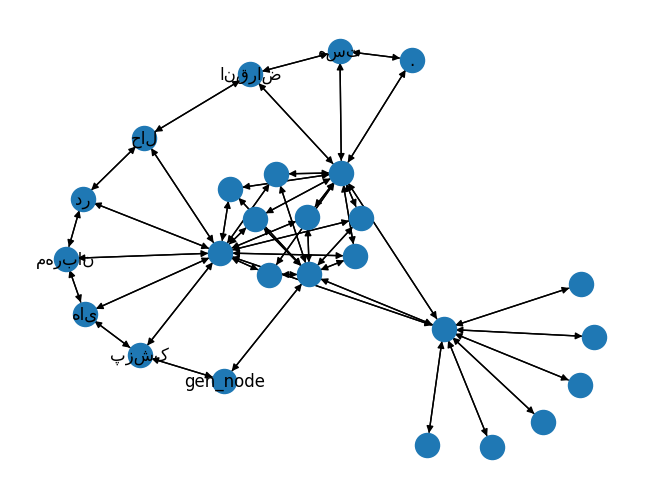

In [18]:
graph_const.draw_graph(2)

# Test \Practices\Tasks\TextToGraph\DependencyGraphConstructionTest.ipynb

In [19]:
from Scripts.DataManager.GraphConstructor.DependencyGraphConstructor import DependencyGraphConstructor

In [20]:
graph_const = DependencyGraphConstructor(text, r'data\GraphData\Dependency', config, naming_prepend='graph', load_preprocessed_data=False, use_node_dependencies=True , use_compression=True)
graph_const.setup(load_preprocessed_data=False)

2024-05-27 23:29:40 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-05-27 23:29:45 INFO: Downloaded file to C:\Users\razieh\stanza_resources\resources.json
2024-05-27 23:29:47 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

2024-05-27 23:29:47 INFO: Using device: cpu
2024-05-27 23:29:47 INFO: Loading: tokenize
2024-05-27 23:29:47 INFO: Loading: mwt
2024-05-27 23:29:47 INFO: Loading: pos
2024-05-27 23:29:47 INFO: Loading: lemma
2024-05-27 23:29:47 INFO: Loading: depparse
2024-05-27 23:29:48 INFO: Loading: ner
2024-05-27 23:29:48 INFO: Done loading processors!
 Creating Graphs : 100%|████

filename: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Dependency\graph_var.txt
self.start_data_load: 0
self.end_data_load: 5
self.saving_batch_size: 1000


 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: c:\Users\razieh\Downloads\Beyond-Words\data\GraphData\Dependency\0_5_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [00:46<00:00, 46.86s/it]

after loading data and pass


In [21]:
graph_const.save_all_data_compressed()

In [22]:
graph_const.save_all_data_compressed()

In [23]:
print(graph_const.get_first()['word'].x)
print(graph_const.get_first()['dep'].x.shape)
print(graph_const.get_first()['word', 'word_dep' , 'dep'].edge_index)
print(graph_const.get_first()['word', 'word_dep' , 'dep'].edge_attr)

tensor([[-0.1866, -0.1177,  0.0247,  ...,  0.0302,  0.0012, -0.0026],
        [ 0.0954,  0.1990, -0.0511,  ..., -0.0092, -0.0296,  0.0649],
        [ 0.1326,  0.0736, -0.1074,  ..., -0.0593,  0.0323, -0.0655],
        ...,
        [-0.0672,  0.0895, -0.0362,  ...,  0.0128,  0.0167,  0.0283],
        [-0.0758,  0.0218, -0.0070,  ...,  0.0784,  0.0457,  0.0124],
        [ 0.0756,  0.0718, -0.0699,  ...,  0.0005, -0.0156,  0.0105]])
torch.Size([66])
tensor([[ 2,  3,  3,  3,  2,  2],
        [27, 48, 22, 61, 54, 22]], dtype=torch.int32)
tensor([1., 1., 1., 1., 1., 1.])
